Please note: all internal links have an asterisk as they do not work in the ED environment.<b>*</b>

# <font color='green' size='8'>Introduction</font>
<p>In 2019, the World Health Organisation conducted a study into the top 10 Global causes of death. The study found that 7 of the 10 leading causes of death were non-communicable diseases, accounting for 44% of all deaths worldwide.</p>

<font color='green' size='2'><b>"The world’s biggest killer is ischaemic heart disease, responsible for 16% of the world’s total deaths. Since 2000, the largest increase in deaths has been for this disease, rising by more than 2 million to 8.9 million deaths in 2019."</b></font> - World Health Organisation ( <a href="https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death">source</a> )

The next biggest killers were stroke and chronic obstructive pulmonary disease. Globally, ischaemic heart disease and stroke are the top killers in a group of diseases known as <b>cardiovascular disease</b> (<font color='green' size='2'><b>CVD</b></font>).

This report uses data gathered from The World Bank, World Health Organisation, and United Nations, to distill the world's leading cause of death into socioeconomic and behavioural factors influencing CVD risk. It will seek to answer the following questions about CVD:

<p><font color='green' size='2'><b>1)</b></font> What has been the trend in cardiovascular disease (CVD) at the national and global level over the past 20 years?</p> ( <a href="#11">see section 11</a> )*
<p><font color='green' size='2'><b>2)</b></font> How has CVD affected different regions/countries of the world?</p> ( <a href="#12">see section 12</a> )*
<p><font color='green' size='2'><b>3)</b></font> How has Australia and its allies & competitors trended over the past 20 years in relation to CVD?</p> ( <a href="#13">see section 13</a> )*
<p><font color='green' size='2'><b>4)</b></font> Does the wealth of nations have an impact on CVD?</p> ( <a href="#14">see section 14</a> )*
<p><font color='green' size='2'><b>5)</b></font> What are the dietary factors which increase or decrease CVD risk?</p> ( <a href="#15">see section 15</a> )*
<p><font color='green' size='2'><b>6)</b></font> What are other risk factors and avenues of research that can expand our understanding of CVD?</p> ( <a href="#16">see section 16</a> )*

<font color='green' size='2'><b>A note on purpose...</b></font>

These questions will help form an understanding of the prevelance and risk factors behind a disease that is less understood than we traditionally believe. A quantitative analysis of the data underlying CVD would allow us to dispell fact from fiction and potentially use this information to better educate and live healthier more productive lives.

<font color='green' size='2'><b>"Despite increases in life expectancy, the rise in chronic and non-communicable diseases have become a global threat"</b></font> - World Health Organisation


# <font color='green' size='8'>Sections</font>

( <a href="#inspect">Inspecting the data</a> )* 1-5 | 
( <a href="#clean">Cleaning the Data</a> )* 6-10 | 
( <a href="#results">Results and analysis</a> )* 11-15 |
( <a href="#end">Conclusion & future investigation</a> )* 16-18

In [1]:
#~~import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

# <font color='green' size='8'>Inspecting the raw data</font>

## 1.The World Bank (T.W.B.)

Health Data ( <a href="https://data.worldbank.org/topic/8">source</a> ) | 
GDP Per Capita ( <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.CD">source</a> )

In [2]:
#~~read these excel files/tabs into a pandas dataframe
wordbank_data_sheet1=pd.read_excel(r'D:\General\API_8_DS2_en_excel_v2_2714841b.xls', sheet_name='Data')
wordbank_data_sheet2=pd.read_excel(r'D:\General\API_8_DS2_en_excel_v2_2714841b.xls', sheet_name='Data (2)')
gdp_pc=pd.read_excel(r'D:\General\API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_2708757.xls', sheet_name='Data')

#~~show first 3 rows of data
display(wordbank_data_sheet1.head(3))

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-07-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0


<font color='green' size='2'><b>Observation:</b></font>
* Notice TWB health data is spread over two different tabs in the excel file. The first tab (displayed) has unnamed column headers because the data on that tab doesn't begin until row 3. We will clean this up in the next section but note that we could use <i>skiprows</i> during pd.read_excel to avoid some additional cleaning. The second sheet does not have such issues.
* TWB GDP Per Capita data is read from a separate file and storaged in gdp_pc dataframe
* Some countries have a comma separated country title as part of the name. We will need to note this during data cleaning.
* TWB data starts from 1960 to 2020

<font color='green' size='2'><b>Note:</b></font>
* Due to file size restrictions, some of the unnecessary data rows were <b>removed</b> to reduce the file size from the original 28MB. The original file can still be found through the link provided above and will still work through the same steps outlined in the data cleansing section. (applies to: API_8_DS2_en_excel_v2_2714841b.xls)

## 2. World Health Organisation (W.H.O.)

Non-Communicative Diseases Data
( <a href="https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-attributed-to-non-communicable-diseases-by-type-of-disease-and-sex">source</a> )

In [3]:
#~~read these excel files/tabs into a pandas dataframe
worldhealthOrg=pd.read_csv(r'D:\General\WHONCD3.csv')

#~~show first 3 rows of data
display(worldhealthOrg.head(3))

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDG_SH_DTH_RNCOM,Number of deaths attributed to non-communicabl...,numeric,EUR,Europe,Country,RUS,Russian Federation,Year,2019,...,NaN,NaN,797625.0,NaN,1203905.0,"1,003,695 [797,625 – 1,203,905]",NaN,NaN,EN,2021-02-08T13:00:00.000Z
1,SDG_SH_DTH_RNCOM,Number of deaths attributed to non-communicabl...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,NaN,NaN,731.3,NaN,1336.0,"1,005 [731.3 – 1,336]",NaN,NaN,EN,2021-02-08T13:00:00.000Z
2,SDG_SH_DTH_RNCOM,Number of deaths attributed to non-communicabl...,numeric,AFR,Africa,Country,GNQ,Equatorial Guinea,Year,2019,...,NaN,NaN,603.3,NaN,2073.0,"1,192 [603.3 – 2,073]",NaN,NaN,EN,2021-02-08T13:00:00.000Z


<font color='green' size='2'><b>Observation:</b></font>
* The country names column may have different representation to TWB file. For instance Egypt is 'Egypt, Arab Rep.' in TWB data, but it is simply 'Egypt' in the WHO data. It is more reliable in this case to use the <font color='green'><b>ISO 3166-1 alpha-3</b></font> country codes to link the data.
* The WHO data starts from 2000 to 2019.

<font color='green' size='2'><b>Note:</b></font>
* Due to file size restrictions, some of the unnecessary data rows were <b>removed</b> to reduce the file size from the original 12MB. The original file can still be found through the link provided above and will still work through the same steps outlined in the data cleansing section. (applies to: WHONCD3.csv)

## 3. United Nations ISO 3166-1 alpha-3 country codes

Country codes ( <a href="https://unstats.un.org/unsd/methodology/m49/overview/">source</a> )

In [4]:
#~~read these csv files/tabs into a pandas dataframe
UN_df=pd.read_csv(r'D:\General\UNSD—Methodology.csv')

#~~show first 5 rows of data
display(UN_df.head(5))

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,Unnamed: 16
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN,Developing,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing,NaN


<font color='green' size='2'><b>Observation:</b></font>
* Has more columns than required, however it does contain list of all <font color='green'><b>ISO 3166-1 alpha-3</b></font> country codes we can use for reference.

## 4. The World Bank Official SHP file

Administrative boundaries ( <a href="https://datacatalog.worldbank.org/dataset/world-bank-official-boundaries">source</a> )

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


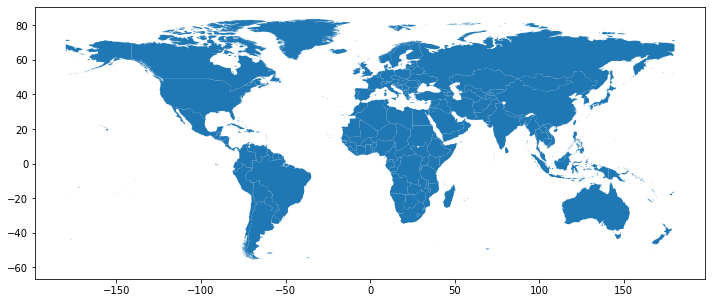

In [5]:
#~~read these excel files/tabs into a pandas dataframe
world_map=gpd.read_file('D:\General\WB_countries_Admin0_10m.shp')

#~~show first 3 rows of data
display(world_map.head(3))

#~~Let's preview the world map
w=world_map.plot(figsize=[12,10])

<font color='green' size='2'><b>Observation:</b></font>
* TWB Official SHP file has more columns than required, however it lacks the <font color='green'><b>ISO 3166-1 alpha-3</b></font> country codes we require.
* If a country has a title, such as The Republic of Korea (KOR), TWB has the naming convention of country, title. We will use this convention to introduce <font color='green'><b>ISO 3166-1 alpha-3</b></font> country codes to the SHP file.

## 5. Global Nutrition Report

National nutrition Data ( <a href="https://globalnutritionreport.org/resources/nutrition-profiles/">source</a> )

In [6]:
#~~read these excel files/tabs into a pandas dataframe
global_nutrition=pd.read_excel(r'D:\General\Country_Nutrition_Profiles_data-.xlsx', sheet_name='Country diet')

#~~show first 3 rows of data
display(global_nutrition.head(3))

,iso3,country,region,subregion,disaggregation,disagg.value,section,Calcium_2019,continued_breastfeeding_1yr_2000,continued_breastfeeding_1yr_2001,...,solid_foods_2014,solid_foods_2015,solid_foods_2016,solid_foods_2017,solid_foods_2018,solid_foods_2019,Sugar-sweetened beverages_2019,Trans fat_2019,Vegetables_2019,Whole grain_2019
0,AFG,Afghanistan,Asia,Southern Asia,age,0-1 month,Diet,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Asia,Southern Asia,age,12-15 months,Diet,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Asia,Southern Asia,age,12-23 months,Diet,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='green' size='2'><b>Observation:</b></font>
* Data is relatively clean and includes <font color='green'><b>ISO 3166-1 alpha-3</b></font> country codes

# <font color='green' size='8'>Cleaning the data</font>

## 6. The World Bank health data
Initial reading of The World Bank data shows the following:

    1) The World Bank data is spread across two sheets
    2) The actual data in 'Data' sheet does not start until row 3 (excluding the column headers) 
    3) The column values are stored in unstacked years starting 1960 ending 2020

We will take the following steps to create a consolidated dataframe from which we will draw our analysis:

    1) concatenate the data into one dataframe
    2) Delete the first 3 rows in wordbank_data_sheet1
    3) Stack the years columns to enable easier manipulation of the data
    4) Ensure the years column are integers
    5) Remove row if Value column is empty
    6) Reset the row index

A data dictionary of the available indicators is available in a separate tab of the workbook.

We are interested the indicators below, which requires filtering of the 'Indicator Code' column

* Current health expenditure per capita, PPP (current international $) [<font color='green' size='1'><b>SH.XPD.CHEX.PP.CD</b></font>]
* Death rate, crude (per 1,000 people) [<font color='green' size='1'><b>SP.DYN.CDRT.IN</b></font>]
* UHC service coverage index [<font color='green' size='1'><b>SH.UHC.SRVS.CV.XD</b></font>]
* Population, total [<font color='green' size='1'><b>SP.POP.TOTL</b></font>]


In [7]:
#~~rename the columns headers as per row 2 in the data
wordbank_data_sheet1.columns = wordbank_data_sheet1.iloc[2]

#~~drop the first 3 rows inplace
wordbank_data_sheet1.drop(wordbank_data_sheet1.index[:3], inplace=True)

#~~concat first tab with second tab data and ignore the index
WorldBank_df=pd.concat([wordbank_data_sheet1, wordbank_data_sheet2], ignore_index=True)

#~~filter for the health indicators specified above
WorldBank_df=WorldBank_df[WorldBank_df['Indicator Code'].isin([
    'SH.XPD.CHEX.PP.CD',
    'SP.DYN.CDRT.IN',
    'SH.UHC.SRVS.CV.XD',
    'SP.POP.TOTL',
])]

#~~set index columns to maintain their stacking level, and stack values data on the 'Years column'
#~~reset index and rename the stacked columns
WorldBank_df=WorldBank_df.set_index([
    'Country Name',
    'Country Code',
    'Indicator Name',
    'Indicator Code',
]).stack().reset_index().rename(columns={'level_4':'Years',0:'Value'})

#~~make the 'Years' column astype integer
WorldBank_df['Years'] = WorldBank_df['Years'].astype(int)

#~~remove all rows in the dataframe that have no value for the indicator (value)
WorldBank_df = WorldBank_df[WorldBank_df['Value'].notna()]

#~~Split country titles from Name
country_name=WorldBank_df['Country Name'].str.split(",",n=1,expand=True)

#~~reinsert back into WB_NAME column
WorldBank_df['Country Name']=country_name[0]

display(WorldBank_df)


,Country Name,Country Code,Indicator Name,Indicator Code,Years,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54208.000000
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55434.000000
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56234.000000
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56699.000000
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57029.000000
...,...,...,...,...,...,...
35897,Zimbabwe,ZWE,"Current health expenditure per capita, PPP (cu...",SH.XPD.CHEX.PP.CD,2016,208.095566
35898,Zimbabwe,ZWE,"Current health expenditure per capita, PPP (cu...",SH.XPD.CHEX.PP.CD,2017,198.812424
35899,Zimbabwe,ZWE,"Current health expenditure per capita, PPP (cu...",SH.XPD.CHEX.PP.CD,2018,198.016861
35900,Zimbabwe,ZWE,UHC service coverage index,SH.UHC.SRVS.CV.XD,2015,54.000000


* We will use The World Bank dataframe as our basis for further analysis in later sections
* We can carry out similar steps to cleanse GDP per Capita data

In [8]:
#~~rename the columns headers as per row 2 in the data
gdp_pc.columns = gdp_pc.iloc[2]

#~~drop the first 3 rows inplace
gdp_pc.drop(gdp_pc.index[:3], inplace=True)

#~~set index columns to maintain their stacking level, and stack values data on the 'Years column'
#~~reset index and rename the stacked columns
gdp_pc=gdp_pc.set_index([
    'Country Name',
    'Country Code',
    'Indicator Name',
    'Indicator Code',
]).stack().reset_index().rename(columns={2:'Years',0:'Value'})

#~~make the 'Years' column astype integer
gdp_pc['Years'] = gdp_pc['Years'].astype(int)

#~~remove all rows in the dataframe that have no value for the indicator (value)
gdp_pc = gdp_pc[gdp_pc['Value'].notna()]

#~~Split country titles from Name
country_name=gdp_pc['Country Name'].str.split(",",n=1,expand=True)

#~~reinsert back into WB_NAME column
gdp_pc['Country Name']=country_name[0]

display(gdp_pc.head(3))

,Country Name,Country Code,Indicator Name,Indicator Code,Years,Value
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1990,23307.895422
1,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1991,25020.119991
2,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1992,25659.438778


## 7. World Health Organisation

Initial reading of World Health Organisation data shows it is already relatively clean.
We will take the following actions:

    1) Filter for Cardiovascular Disease in column 'Dim2' and filter for 'Both sexes' in Column 'Dim1'
    2) Select only the required columns
    3) Rename the columns to align with The World Bank dataframe: Country Code, Country Name, Years, and Value
    4) Reset the index and remove columns name '1'
    5) Add an 'Indicator Name' column to describe the data
    6) Map WorldBank_df Country code to WorldBank_df Country name
    7) Use mapping above in worldhealthOrg mapping Country Code to a new column Country Name

In [9]:
#~~1) Filter for Cardiovascular Disease in column 'Dim2' and filter for 'Both sexes' in Column 'Dim1'
worldhealthOrg=worldhealthOrg[(worldhealthOrg['Dim2']=='Cardiovascular diseases') & (worldhealthOrg['Dim1']=='Both sexes')]

#~~remove columns with all missing or no values
worldhealthOrg.dropna(axis=1, how='all', inplace=True)

#~~2) Select only the required columns
worldhealthOrg=worldhealthOrg[['SpatialDimValueCode','Location','Period','FactValueNumeric']].reset_index(drop=True)

#~~3) Rename the columns to align with The World Bank dataframe: Country Code, Country Name, Years, and Value
worldhealthOrg.columns=['Country Code', 'Country Name', 'Years', 'Value']

#~~4) Reset the index (above) and remove columns name '1'
worldhealthOrg.columns.name=None

#~~5) Add an 'Indicator Name' column to describe the data
worldhealthOrg['Indicator Name']='Est Deaths from CVD'
worldhealthOrg['Years'] = worldhealthOrg['Years'].astype(int)

#~~6) Map WorldBank_df Country code to WorldBank_df Country name
Name_map=pd.Series(WorldBank_df['Country Name'].values,index=WorldBank_df['Country Code']).to_dict()

#~~7) Use mapping above in worldhealthOrg mapping Country Code to a new column Country Name
worldhealthOrg['Country Name'] = worldhealthOrg['Country Code'].map(Name_map)

display(worldhealthOrg)

,Country Code,Country Name,Years,Value,Indicator Name
0,RUS,Russian Federation,2019,1003695.0,Est Deaths from CVD
1,BRB,Barbados,2019,1005.0,Est Deaths from CVD
2,GNQ,Equatorial Guinea,2019,1192.0,Est Deaths from CVD
3,BTN,Bhutan,2019,1284.0,Est Deaths from CVD
4,LUX,Luxembourg,2019,1286.0,Est Deaths from CVD
...,...,...,...,...,...
3655,MMR,Myanmar,2000,93505.0,Est Deaths from CVD
3656,USA,United States,2000,930893.0,Est Deaths from CVD
3657,TLS,Timor-Leste,2000,938.6,Est Deaths from CVD
3658,MEX,Mexico,2000,97118.0,Est Deaths from CVD


* We will use the World Health Organisation dataframe and match this to The World Bank dataframe below

## 8. United Nations

Initial reading of United Nations country codes, we will retain only the columns required:

    * Country or Area
    * ISO-alpha3 Code
    * Developed / Developing Countries

In [10]:
#~~select for the 3 columns of interest
UN_df=UN_df[['Country or Area','ISO-alpha3 Code','Developed / Developing Countries']]

display(UN_df.head(4))

,Country or Area,ISO-alpha3 Code,Developed / Developing Countries
0,Algeria,DZA,Developing
1,Egypt,EGY,Developing
2,Libya,LBY,Developing
3,Morocco,MAR,Developing


## 9. The World Bank SHP file merge ISO 3166-1 alpha-3

We can map the TWB dataframe <font color='green'><b>ISO 3166-1 alpha-3</b></font> 'Country Codes' column to TWB SHP file. Mapping country names with similar naming conventions from the TWB dataframe to the TWB SHP file should provide a higher match rate.

In [11]:
#~~create a column of country names split from country titles
country_name=world_map['WB_NAME'].str.split(",",n=1,expand=True)

#~~reinsert back into WB_NAME column
world_map['WB_NAME']=country_name[0]

#~~create index-value mapping between country name and country code
Country_dict=pd.Series(WorldBank_df['Country Code'].values,index=WorldBank_df['Country Name']).to_dict()

#~~apply the created mapping from WB_Name to a new column called Country Code
world_map['Country Code'] = world_map['WB_NAME'].map(Country_dict)

#~~extract columns of interest
world_map=world_map[['WB_NAME','Country Code','geometry']].reset_index().copy()

display(world_map.head(5))

#~~uncomment to display landmasses with unmatched country codes (only need major countries)
# display(world_map[world_map['Country Code'].isna()].head(50))

#~~show the USA which does not have a country code
display(world_map[world_map['WB_NAME']=='United States of America'])

,index,WB_NAME,Country Code,geometry
0,0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


,index,WB_NAME,Country Code,geometry
149,149,United States of America,NaN,"MULTIPOLYGON (((-95.16057 49.36949, -95.10282 ..."


<font color='green' size='2'><b>Observation:</b></font>
* Notice that 'United States' as named in TWB dataframe is differently named in the SHP file as 'United States of America'. We will need to do a manual adjustment here for the country code to work.
* There are other islands and small landmasses which also do not have a matched country code. We will not pursue them in this report however it can be noted that different shape files may come included with <font color='green'><b>ISO 3166-1 alpha-3</b></font> country codes. Using these less official files may eliminate the need for manual matching. 

In [12]:
#~~set the contents of row of United States of America at column Country code to be USA  
world_map.loc[world_map['WB_NAME']=='United States of America','Country Code']='USA'

display(world_map[world_map['WB_NAME']=='United States of America'])

,index,WB_NAME,Country Code,geometry
149,149,United States of America,USA,"MULTIPOLYGON (((-95.16057 49.36949, -95.10282 ..."


## 10. Global Nutrition Report

    1) Filter data by national level
    2) Retain only relevant columns
    3) Remove suffixes ('_2019')

In [13]:
#~~filter dataframe for only national values
global_nutrition=global_nutrition[global_nutrition['disagg.value']=='National'].reset_index()

#~~select for the columns of interest
global_nutrition=global_nutrition[[
    'iso3','country','Calcium_2019','Fibre_2019','Fruit_2019',
    'Legumes_2019','Milk_2019','Nuts and seeds_2019','Omega 3_2019',
    'Polyunsaturated fat_2019','Processed meat_2019',
    'Red meat_2019','Sodium_2019','Sugar-sweetened beverages_2019',
    'Trans fat_2019','Vegetables_2019','Whole grain_2019'
]]

#~~replace all suffixes of '_2019' with '' in the column headers
global_nutrition.columns=global_nutrition.columns.str.replace(r'_2019','')

display(global_nutrition.head(3))

,iso3,country,Calcium,Fibre,Fruit,Legumes,Milk,Nuts and seeds,Omega 3,Polyunsaturated fat,Processed meat,Red meat,Sodium,Sugar-sweetened beverages,Trans fat,Vegetables,Whole grain
0,AFG,Afghanistan,0.30,11.13,65.47,8.57,84.37,3.46,9.71,0.79,2.83,18.78,2.54,10.83,0.48,25.80,1.73
1,AGO,Angola,0.28,18.87,104.83,30.38,20.46,5.69,31.33,3.17,6.86,18.21,2.81,27.52,0.26,87.63,25.42
2,ALB,Albania,1.17,17.69,260.09,21.05,459.46,4.93,46.50,1.41,59.95,42.55,5.05,145.98,0.39,381.98,1.74


<font color='green' size='2'><b>Observation:</b></font>
* Note that the columns of interest in the nutrition dataset pertains to <font color='green' size='2'><b>2019</b></font> only

# <font color='green' size='8'>Results and Analysis</font>

## 11. Global Trends for Cardiovascular Disease (C.V.D.)
 
Now let's extract the required data for our first visualisation.
We will require the follow indicators:

    * Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]
    * Population, total [SP.POP.TOTL]

In [14]:
#~~aggregate WHO data by years to produce global estimate of number of deaths
WHO_AGG_CVD=worldhealthOrg.groupby(['Indicator Name','Years'])['Value'].sum()

#~~resetting index allows us to reintroduce 'Years' and 'indicator name' into the dataframe for concat
WHO_AGG_CVD=WHO_AGG_CVD.reset_index()

#~~filter worldbank dataframe by world aggregates for crude death rate and total population
World_CVD=WorldBank_df[(WorldBank_df['Country Code']=='WLD') & 
                       (WorldBank_df['Indicator Code'].isin(['SP.DYN.CDRT.IN','SP.POP.TOTL']))]

#~~select columns of interest: 'Indicator Name','Years','Value'
#~~ensure the table has same columns as World Health Org data prior to concat
World_CVD=World_CVD[['Indicator Name','Years','Value']]
World_CVD=pd.concat([World_CVD,WHO_AGG_CVD], ignore_index=True)

#~~unstack the health indicators to compare them side by side for each year
World_CVD=World_CVD.groupby(['Years','Indicator Name'])['Value'].sum().unstack()

#~~calculate the cardiovascular disease death rate = C.V.D. deaths per 1000 * (world pop/1000)
World_CVD['CVD Death Rate']=(World_CVD['Est Deaths from CVD']/
                             ((World_CVD['Population, total']/1000)*World_CVD['Death rate, crude (per 1,000 people)']))

#~~drop columns no longer required & remove rows missing estimated deaths from C.V.D.
World_CVD.drop(['Death rate, crude (per 1,000 people)','Population, total'], axis=1, inplace=True)
World_CVD = World_CVD[World_CVD['CVD Death Rate'].notna()]

#~~make est. number of deaths an integer
World_CVD['Est Deaths from CVD'] = World_CVD['Est Deaths from CVD'].astype(int)

display(World_CVD)

Indicator Name,Est Deaths from CVD,CVD Death Rate
Years,,
2000,14281320,0.271833
2001,14560619,0.276152
2002,14942750,0.280888
2003,15213919,0.284265
2004,15060044,0.282440
2005,15175618,0.281723
2006,15236145,0.282136
2007,15405631,0.284297
2008,15666683,0.287271


Now to visualise the dataframe

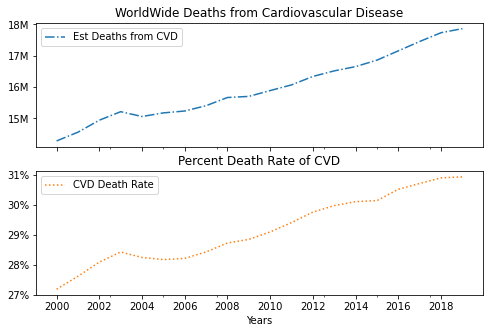

In [15]:
#~~create a function for the purpose of formatting units of scale in plots
def form_num(ax_value, indx):
    if ax_value >= 1000000:
        #~~if number is in millions, format the number to M (replacing six zeros)
        formatted_num='{:1.0f}M'.format(ax_value*0.000_001)
    else:
        #~~else: change all other values to percentage format
        formatted_num='{:1.0f}%'.format(ax_value*100)
    return formatted_num

#~~pandas plot of timeline data from previous section:
fig_a= World_CVD.plot(
    subplots=True, #~~enable subplots
    style=['-.',':'], #~~format line style
    title=['WorldWide Deaths from Cardiovascular Disease','Percent Death Rate of CVD'],
    xticks=[x for x in range(2000,2020,2)], #~~set xticks between 2000-2020 in increments of 2
    figsize=[8,5] #~~resize the plot [width,height] in inches
)

#~~iterate through subplots and reformat the yaxis using the function form_num
for x in range(0,2):
    fig_a[x].yaxis.set_major_formatter(form_num)


<font color='green' size='2'><b>Question:</b></font> What has been the trend in cardiovascular disease (CVD) at the global level over the past 20 years?

<font color='green' size='2'><b>Observation:</b></font>
* The figures show an <font color='green'><b>increase from approx 27% to 31% death rate since 2000.</b></font> This is close to WTO's estimates of 32%. ( <a href="https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1">source</a> )
* This equates to an increase from 14.3Million deaths per year (2000) to 17.9Million deaths per year (2019), an increase of 3.6Million deaths per year.

## 12. Cardiovascular Disease Trends by Country

Let's investigate if the global trends are consistent across countries.

    1) TWB has population & crude death rate statistics from 2000 to 2020
    2) We will need to calculate the total number of deaths by country where Total deaths = crude death rate x population
    3) Compare this with recorded national number of CVD deaths from WHO data
    4) Create CVD death rate (%) from the equation: CVD deaths / Total deaths
    5) Map international CVD death rates (%) in year 2019

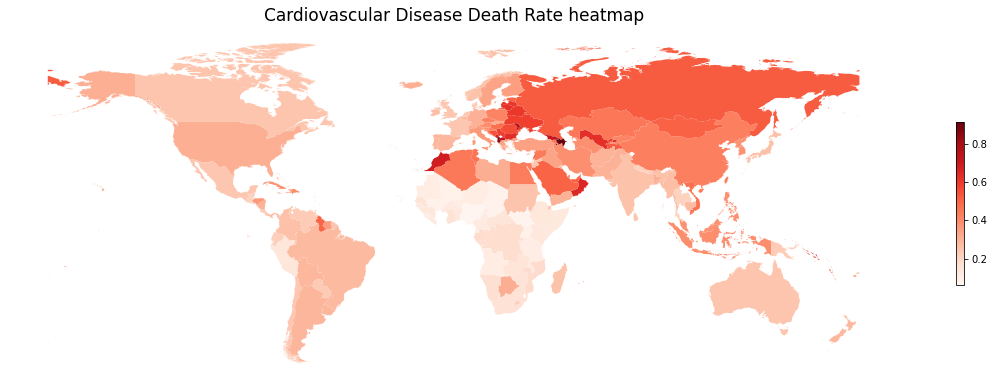

In [16]:
#~~first filter WorldBank_df by the indicators of interest: Population and crude death rate - save as 'country_trends'
country_trends=WorldBank_df[WorldBank_df['Indicator Code'].isin(['SP.POP.TOTL','SP.DYN.CDRT.IN'])]

#~~create the same columns between country_trends df and WHO df
del country_trends['Indicator Code']

#~~concat country_trends data with WHO data
country_trends=pd.concat([country_trends, worldhealthOrg], ignore_index=True)

#~~unstack the indicators to create new calculated columns by country and years ('Total deaths' & 'CVD Death rate')
country_trends=country_trends.groupby(['Country Code','Country Name', 'Years','Indicator Name'])['Value'].sum().unstack()

#~~create column to capture Total deaths by country and years
country_trends['Total deaths']=(country_trends['Death rate, crude (per 1,000 people)']
                                *(country_trends['Population, total']/1000))

#~~create column to capture CVD Death rate by country and years
country_trends['CVD Death rate']=(country_trends['Est Deaths from CVD']
                                  /country_trends['Total deaths'])

#~~Reset the index to remove groupings
country_trends=country_trends.reset_index()

#~~remove rows with missing CVD deaths information
country_trends = country_trends[country_trends['Est Deaths from CVD'].notna()]

#~~drop columns not required for analysis
country_trends.drop(['Death rate, crude (per 1,000 people)','Population, total','Total deaths',
                     'Est Deaths from CVD'], axis=1, inplace=True)

#~~set dataframe for 2019
CVD_2019=country_trends[country_trends['Years']==2019]

#~~create index-value mapping between 2019 CVD Death Rate to each country code
CVD_dict=pd.Series(CVD_2019['CVD Death rate'].values,index=CVD_2019['Country Code']).to_dict()

#~~apply the created mapping in world_map['Country Code'] to a new column called CVD Death rate
world_map['CVD Death rate'] = world_map['Country Code'].map(CVD_dict)

#~~create a pyplot subplot with figure size (20,8)
fig, w_m=plt.subplots(1,figsize=(20,10))

#~~turn off axis
w_m.axis('off')

#~~create a Title
w_m.set_title('Cardiovascular Disease Death Rate heatmap', fontdict={'fontsize': '17', 'fontweight': '10'})

#~~plot world_map geodata
fig_b=world_map.plot(
    cmap='Reds', #~~with 'Reds' color scheme
    column='CVD Death rate', #~~colors based on 'CVD death rate'
    ax=w_m, #~~on same axis as subplot created above for w_m
    legend=True, #~~include a legend
    legend_kwds={'shrink': 0.3}, #~~resize the legend
)

<font color='green' size='2'><b>Question:</b></font> How has CVD affected different regions/countries of the world?

<font color='green' size='2'><b>Observation:</b></font>
* We can see from the heatmap on average developed nations have a <b>higher</b> death rate from CVD than do developing countries. <font color='green' size='2'><b>Russia</b></font> is a notable example as it is a large landmass with relatively high CVD death rates. <font color='green' size='2'><b>China</b></font> is another notable example. While it is officially a 'developing' country, the second largest economy in the world has a higher CVD death rate than the United States.
* <font color='green' size='2'><b>Eastern Europe, North Africa, and the Middle East</b></font> also have relatively high levels of CVD death risk.
* Cardiovascular disease was at one point described as a 'disease of the rich'. However in modern times this trend maybe changing.
* For context, let's deep dive into some of Australia's major allies/competitors and examine trends over time.

## 13. Cardiovascular Disease trends by Major Allies and Competitors

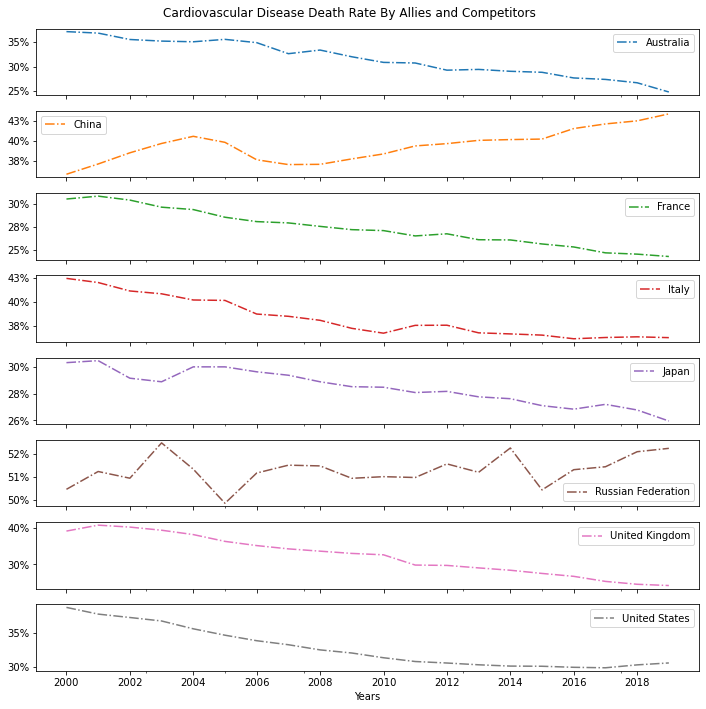

In [17]:
#~~make a copy of the country_trends df to be used in Allies and competitors analysis
CVD_AC=country_trends

#~~remove country codes as this is not relevant to our plot
CVD_AC=CVD_AC.drop(['Country Code'], axis=1)

#~~filter by some well known countries as individual case studies
CVD_AC=CVD_AC[CVD_AC['Country Name'].isin([
    'Russian Federation',
    'China',
    'United Kingdom',
    'Australia',
    'United States',
    'France',
    'Italy',
    'Japan',])]

#~~generate an iterator to capture the number of subplots
plot_iterator=CVD_AC['Country Name'].nunique()

#~~group 'Years' and unstack 'country name' to plot by each country 
CVD_AC=CVD_AC.groupby(['Years','Country Name'])['CVD Death rate'].sum().unstack()

#~~create pandas plot of CVD by Allies and competitors in fig_c
fig_c=CVD_AC.plot(
    subplots=True,
    style='-.',
    figsize=[10,10],
    xticks=[x for x in range(2000,2020,2)],
    sharex=True,
    title='Cardiovascular Disease Death Rate By Allies and Competitors',
)

#~~select fig_c and apply a tight layout with title label closer to the plot
allies_comp=fig_c[0].get_figure()
allies_comp.tight_layout()
allies_comp.subplots_adjust(top=0.95)

#~~uncomment to set plot title and title size
# allies_comp.suptitle('Cardiovascular Disease Death Rate By Allies and Competitors', fontsize=15)

#~~iterate through subplots and reformat their yaxis using the function form_num
for x in range(0,plot_iterator):
    fig_c[x].yaxis.set_major_formatter(form_num)

<font color='green' size='2'><b>Question:</b></font> How has Australia and its allies & competitors trended over the past 20 years in relation to CVD?

<font color='green' size='2'><b>Observation:</b></font>
* The graph indicates that over the past 2 decades, most major economies have experienced falling rates of CVD. The notable exception here is China and Russian, with the later exhibiting recent increases in CVD death rates.
* Next, let's answer the question: <font color='green'><b>Do countries that can afford better food and healthcare have lower CVD death rates?</b></font>

## 14. Cardiovascular Disease trends by national wealth indicators:
We will investigate the following indicators of wealth:

    1) GDP Per capita (2018, PPP)
    2) Health expenditure per capita (2018, PPP)
    3) Universal Heathcare coverage (2017)

<font color='green'><b>What is UHC?</b></font> "UHC means that all individuals and communities receive the health services they need without suffering financial hardship. It includes the full spectrum of essential, quality health services, from health promotion to prevention, treatment, rehabilitation, and palliative care across the life course." - World Health Organisation 2021 ( <a href="https://www.who.int/news-room/fact-sheets/detail/universal-health-coverage-(uhc)">source</a> )

In this analysis, we will utilise GDP and Health expenditure data from 2018, and Universal Healthcare coverage data up to 2017.
These have been chosen as the latest data available and we will match them with the corresponding CVD Death rates for 2018 and 2017.

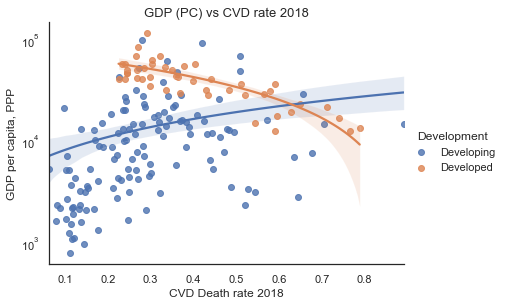

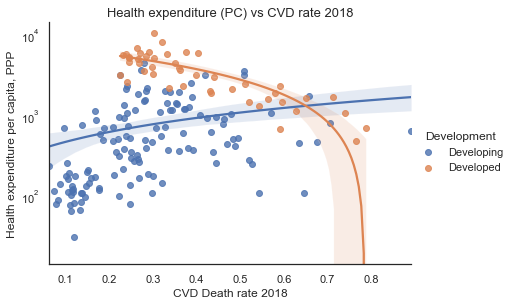

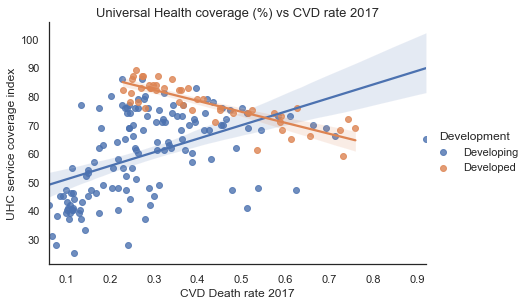

In [18]:
#~~create a copy of TWB dataframe and filter for 2018 Health expenditure OR 2017 UHC coverage
gdp_health=WorldBank_df[
    ((WorldBank_df['Years']==2018)&(WorldBank_df['Indicator Code']=='SH.XPD.CHEX.PP.CD'))|
    ((WorldBank_df['Years']==2017)&(WorldBank_df['Indicator Code']=='SH.UHC.SRVS.CV.XD'))]

#~~concatenate with 2018 GDP per capita data in gdp_pc
gdp_health=pd.concat([gdp_health, gdp_pc[gdp_pc['Years']==2018]], ignore_index=True)

#~~remove unneeded columns 'Indicator Code' & 'Years'
gdp_health.drop(['Indicator Code','Years'], axis=1, inplace=True)

#~~group the columns 'Country Name','Country Code' & 'Indicator Name' and sum aggregate 'Value'
#~~then unstack the columns by indicator name and reset the index
gdp_health=gdp_health.groupby(['Country Name','Country Code','Indicator Name'])['Value'].sum().unstack().reset_index()

#~~clear the header name for the index column
gdp_health.columns.name=None

#~~we will use consistent naming conventions for variables
CVD_2017=country_trends[country_trends['Years']==2017]
CVD_2018=country_trends[country_trends['Years']==2018]

#~~create index-value mapping of the 2017 CVD Death Rate to each country code 
CVD_dict=pd.Series(CVD_2017['CVD Death rate'].values,index=CVD_2017['Country Code']).to_dict()

#~~apply the mapping to gdp_health dataframe; mapping 'Country Code' to a new column 'CVD Death rate 2017'
gdp_health['CVD Death rate 2017'] = gdp_health['Country Code'].map(CVD_dict)

#~~create index-value mapping of the 2018 CVD Death Rate to each country code 
CVD_dict=pd.Series(CVD_2018['CVD Death rate'].values,index=CVD_2018['Country Code']).to_dict()

#~~apply the mapping to gdp_health dataframe; mapping 'Country Code' to a new column 'CVD Death rate 2018'
gdp_health['CVD Death rate 2018'] = gdp_health['Country Code'].map(CVD_dict)

#~~follow a similar process to map the UN classification of Developed / Developing Countries to gdp_health
Development_dict=pd.Series(UN_df['Developed / Developing Countries'].values,index=UN_df['ISO-alpha3 Code']).to_dict()
gdp_health['Development'] = gdp_health['Country Code'].map(Development_dict)

#~~set style of seaborn plot
sns.set(style="white")

#~~New plot~~#
#~~create a seaborn linear model plot. This provides a line of best fit
gdpcap_plot = sns.lmplot(
    x='CVD Death rate 2018', #~~column used for x axis
    y='GDP per capita, PPP (current international $)', #~~column used for y axis
    data=gdp_health, #~~dataframe used
    hue='Development', #~~grouping the data by this column which will determine colors of the groups
    legend=True, #~~include legend
    height=4, #~~height of plot
    aspect=1.5, #~~width as a multiple of height
)

#~~access the plt just created
wealth_plot = plt.gca()

#~~make adjustments to the title and font
wealth_plot.set_title('GDP (PC) vs CVD rate 2018',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

#~~set a custom ylabel and set y-axis to logscale
gdpcap_plot.set(
    ylabel='GDP per capita, PPP',
    yscale="log",
)

#~~New plot~~#
#~~create a seaborn linear model plot. This provides a line of best fit
hth_exp_plot = sns.lmplot(
    x='CVD Death rate 2018',
    y='Current health expenditure per capita, PPP (current international $)', 
    data=gdp_health, 
    hue='Development',
    legend=True,
    height=4,
    aspect=1.5,
)

#~~access the plt just created
wealth_plot = plt.gca()

#~~make adjustments to the title and font
wealth_plot.set_title('Health expenditure (PC) vs CVD rate 2018',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

#~~set a custom ylabel and set y-axis to logscale
hth_exp_plot.set(
    ylabel='Health expenditure per capita, PPP',
    yscale="log",
)

#~~New plot~~#
#~~create a seaborn linear model plot. This provides a line of best fit
UHC_plot = sns.lmplot(
    x='CVD Death rate 2017', 
    y='UHC service coverage index', 
    data=gdp_health, 
    hue='Development',
    legend=True,
    height=4,
    aspect=1.5,
)

#~~access the plt just created
wealth_plot = plt.gca()

#~~make adjustments to the title and font
wealth_plot.set_title('Universal Health coverage (%) vs CVD rate 2017',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

#~~set a custom ylabel. Notice no log scale
UHC_plot.set(
    ylabel='UHC service coverage index',
)

<font color='green' size='2'><b>Question:</b></font> Does the wealth of nations have an impact on CVD?

<font color='green' size='2'><b>Observation:</b></font>
* Notice that the UHC coverage index did <b>not</b> utilise a log-scale as the index is scaled between 0-100 
* What is striking about the graphs above are the different trends for developed and developing countries:

    * <font color='green' size='2'><b>For developed countries, CVD death rates decrease as their wealth increases.</b></font>
    * <font color='green' size='2'><b>For developing countries, CVD death rates increase as their wealth increases.</b></font>


* Some possible factors for <font color='green' size='2'><b>negative correlation</b></font> with CVD include:

    * Better nutrition and diversity of food sources; better food systems. (True of developed countries)
    * More physical exercise and relaxation due to less labour intensive workforces. (True of developed countries)
    * Better education systems and greater access to medical knowledge and resources. (True also of developed countries)
    * Hours worked and other social protections, allows populations to seek better health outcomes through physical leisure activity 


* A  <font color='green' size='2'><b>positive correlation</b></font> in developing countries may exist due to:

    * Poor health infrustructure and structural inequality, leading to inequality in the population and associated health outcomes
    * A difference in food systems, with less emphasis on quality and greater emphasis on convenience and cost (consuming mostly carbohydrates)
    * Changes in lifestyle from technology and globalisation allows workforces to seek a more sedentary lifestyle

We will investigate the hypothesised link between nutrition and CVD in the following section.

<font color='green' size='2'><b>Further reading:</b></font> ( <a href="https://www.brookings.edu/research/the-future-of-work-in-the-developing-world/">The future of work in the developing world</a> ) | ( <a href="https://www.youtube.com/watch?v=TCS6A9RJVvo&t=14s">Obesity is Only a Rich Country Problem, Right? Wrong. World Bank Expert Answers</a> )

## 15. Cardiovascular Disease trends by Diet & Nutrition

Text(0.5, 1.0, 'Food Group 4 intake vs CVD rate 2019')

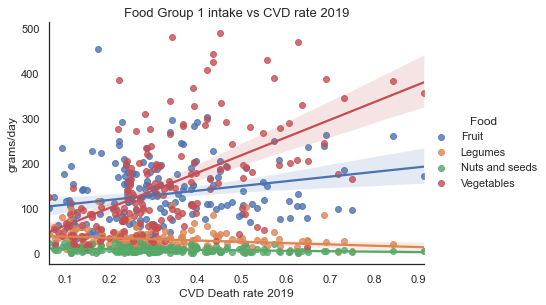

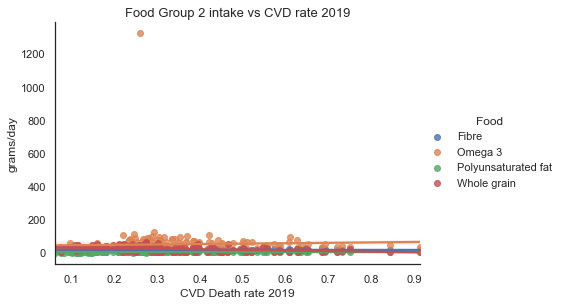

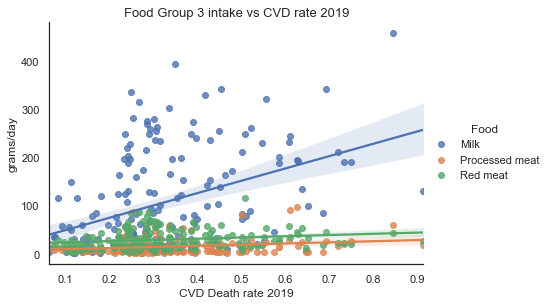

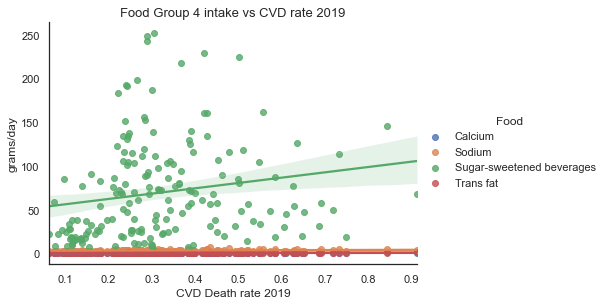

In [19]:
#~~map the 2019 CVD Death Rate to each country country code in the 2019 dataframe (from section 12)
CVD_dict=pd.Series(CVD_2019['CVD Death rate'].values,index=CVD_2019['Country Code']).to_dict()

#~~apply mapping to global_nutrition dataframe; mapping iso3 to new column CVD Death rate 2019
global_nutrition['CVD Death rate 2019'] = global_nutrition['iso3'].map(CVD_dict)

#~~set index columns to maintain their stacking level; stack the different food groups & nutrient intake values
#~~reset index and rename the stacked columns
global_nutrition=global_nutrition.set_index([
    'country',
    'iso3',
    'CVD Death rate 2019',
]).stack().reset_index().rename(columns={'level_3':'Food', 0:'grams/day'})

#~~filter the dataframe for food group 1
food_group1=global_nutrition[global_nutrition['Food'].isin([
    'Fruit','Vegetables','Legumes','Nuts and seeds',
])]

#~~filter the dataframe for food group 2
food_group2=global_nutrition[global_nutrition['Food'].isin([
    'Whole grain','Fibre','Polyunsaturated fat','Omega 3',
])]

#~~filter the dataframe for food group 3
food_group3=global_nutrition[global_nutrition['Food'].isin([
    'Red meat','Processed meat','Milk',
])]

#~~filter the dataframe for food group 4
food_group4=global_nutrition[global_nutrition['Food'].isin([
    'Sugar-sweetened beverages','Trans fat','Sodium','Calcium',
])]

#~~New plot~~#
#~~create a seaborn linear model plot for food group 1
nutrition_plot1 = sns.lmplot(
    x='CVD Death rate 2019', 
    y='grams/day', 
    data=food_group1, 
    hue='Food',
    legend=True,
    height=4,
    aspect=1.5,
)

#~~access the plt just created & make adjustments to the title and font
nutrition_plot = plt.gca()
nutrition_plot.set_title('Food Group 1 intake vs CVD rate 2019',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

#~~New plot~~#
#~~create a seaborn linear model plot for food group 2
nutrition_plot2 = sns.lmplot(
    x='CVD Death rate 2019', 
    y='grams/day', 
    data=food_group2, 
    hue='Food',
    legend=True,
    height=4,
    aspect=1.5,
)

#~~access the plt just created & make adjustments to the title and font
nutrition_plot = plt.gca()
nutrition_plot.set_title('Food Group 2 intake vs CVD rate 2019',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

#~~New plot~~#
#~~create a seaborn linear model plot for food group 3
sns.lmplot(
    x='CVD Death rate 2019', 
    y='grams/day', 
    data=food_group3, 
    hue='Food',
    legend=True,
    height=4,
    aspect=1.5,
)

#~~access the plt just created & make adjustments to the title and font
nutrition_plot = plt.gca()
nutrition_plot.set_title('Food Group 3 intake vs CVD rate 2019',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

#~~New plot~~#
#~~create a seaborn linear model plot for food group 4
sns.lmplot(
    x='CVD Death rate 2019', 
    y='grams/day', 
    data=food_group4, 
    hue='Food',
    legend=True,
    height=4,
    aspect=1.5,
)

#~~access the plt just created & make adjustments to the title and font
nutrition_plot = plt.gca()
nutrition_plot.set_title('Food Group 4 intake vs CVD rate 2019',
                  fontsize=13, fontweight=30, fontdict={"weight": "bold"})

<font color='green' size='2'><b>Question:</b></font> What are the dietary factors which increase or decrease CVD risk?

<font color='green' size='2'><b>Observation:</b></font>
* There are a few things to note from the above graphs:
    * Increased consumption of <font color='green' size='2'><b>Milk, Sugar-Sweetened beverages, fruits and vegetables</b></font> are associated with increase in CVD death rate. The common tread amoung these foods is that all are high in carbohydrates and sugars, and form the basis of the internationally recognised food pyramid that originated in Sweden and has been endorsed by nutritional boards around the world.
    * This unexpected result contradicts the notion that fats cause CVD. In fact: <font color='green' size='2'><b>Trans fats, sodium, meat, and healthy fats such as Omega 3 and Polyunsaturated fat</b></font>, exhibited no or little correlation with CVD.
    * This finding helps to explain CVD trends by wealth in the previous section. As consumers in developed countries experience increases in wealth, they tend to shift consumption from low cost carbohydrates based foods to higher cost proteins and fats thereby replacing some carbohydrates in the diet and lowering overall sugars. This creates a negative correlation between wealth and CVD risk for developed countries. This is different in developing countries where there is less diversity and availability of fats and proteins. As a result, those populations <font color='green' size='2'><b>increase their consumption of carbohydrates, and experience higher rates of CVD</b></font>.
    * Recent studies support the possibility that it is in fact sugars (not fats) which have a much stronger link with CVD. <font color='green' size='2'><b>Julie Corliss 2014</b></font> ( <a href="https://www.health.harvard.edu/blog/eating-too-much-added-sugar-increases-the-risk-of-dying-with-heart-disease-201402067021">Eating too much added sugar increases the risk of dying with heart disease</a> ) | <font color='green' size='2'><b>Mary E. Gearing 2014</b></font> ( <a href="https://sitn.hms.harvard.edu/flash/2014/fat-vs-sugar-who-will-break-your-heart/">Fat vs. sugar: Who will break your heart?</a> ) | <font color='green' size='2'><b>Norman J. Temple 2018</b></font> ( <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5793267/">Fat, Sugar, Whole Grains and Heart Disease: 50 Years of Confusion</a> ) | ( <font color='green' size='2'><b>The Australia Nutrition Foundation</b></font> <a href="https://nutritionaustralia.org/division/national/a-brief-history-of-the-pyramid-17967/">Food pyramid</a> )

# <font color='green' size='8'>Conclusion</font>

## 16. Future investigation
<font color='green' size='2'><b>Question:</b></font> What are other risk factors and avenues of research that can expand our understanding of CVD?

We know there are other important behavioural risk factors for cardiovascular disease such as <font color='green' size='2'><b>physical inactivity, tobacco use, and alcohol</b></font>. Future research into CVDs could delve into statistical databases, and anonynmised physical activity data to investigate levels of physical inactivity and the correlation to CVD. Social protections & reforms such as set limits to working hours could also impact on the availability of populations to engage in physical activity. Finally, access to technology allows access to information and the ability to self educate. This can be a major factor in the fight against CVD.

## 17. Summary
The analysis in this report has highlighted some important socioeconomic and nutritional factors that play in CVD risk. We have seen that despite increasing levels of global wealth, developing countries are most at risk of rising levels of CVD death (and malnutrition). There is a societal and economic need to recognise and act on the structural factors associated with CVD risk such as the quality of food systems, labour market protections, and global dietary advice and education. Of note is the empirical link between CVD death rates and increased consumption of carbohydrate sugars which contrasts with fundamental nutritional advice around the world. Further research should be conducted to test the validity of traditional health advice as it will have health implications for populations in all countries.

## 18. References
<font color='green' size='2'><b>Julie Corliss 2014 'Eating too much added sugar increases the risk of dying with heart disease'</b></font> accessed 9 August 2021</p>< <a href="https://www.health.harvard.edu/blog/eating-too-much-added-sugar-increases-the-risk-of-dying-with-heart-disease-201402067021">https://www.health.harvard.edu/blog/eating-too-much-added-sugar-increases-the-risk-of-dying-with-heart-disease-201402067021</a> >

<font color='green' size='2'><b>Laurence Chandy 2017 'The future of work in the developing world'</b></font> accessed 9 August 2021</p><
<a href="https://www.brookings.edu/research/the-future-of-work-in-the-developing-world/">https://www.brookings.edu/research/the-future-of-work-in-the-developing-world/</a> >

<font color='green' size='2'><b>Mary E. Gearing 2014 'Fat vs. sugar: Who will break your heart?'</b></font> accessed 9 August 2021</p>< <a href="https://sitn.hms.harvard.edu/flash/2014/fat-vs-sugar-who-will-break-your-heart/">https://sitn.hms.harvard.edu/flash/2014/fat-vs-sugar-who-will-break-your-heart/</a> >

<font color='green' size='2'><b>Norman J. Temple 2018 'Fat, Sugar, Whole Grains and Heart Disease: 50 Years of Confusion'</b></font> accessed 9 August</p>< <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5793267/">https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5793267/</a> >

<font color='green' size='2'><b>The Australia Nutrition Foundation</b></font> accessed 9 August 2021</p>< <a href="https://nutritionaustralia.org/division/national/a-brief-history-of-the-pyramid-17967/">https://nutritionaustralia.org/division/national/a-brief-history-of-the-pyramid-17967/</a> >

<font color='green' size='2'><b>The World Bank 2020 'Obesity is Only a Rich Country Problem, Right? Wrong. World Bank Expert Answers'</b></font> accessed 9 August 2021</p>< <a href="https://www.youtube.com/watch?v=TCS6A9RJVvo&t=14s">https://www.youtube.com/watch?v=TCS6A9RJVvo&t=14s</a> >

<font color='green' size='2'><b>World Health Organisation 2021 'Universal health coverage (UHC)'</b></font> accessed 9 August 2021</p>< <a href="https://www.who.int/news-room/fact-sheets/detail/universal-health-coverage-(uhc)">https://www.who.int/news-room/fact-sheets/detail/universal-health-coverage-(uhc)</a> >

<font color='green' size='2'><b>World Health Organisation 'Cardiovascular diseases'</b></font> accessed 9 August 2021</p>< <a href="https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1">https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1</a> >

<font color='green' size='2'><b>World Health Organisation 2020 'The top 10 causes of death'</b></font> accessed 9 August 2021</p>< <a href="https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death">https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death</a> >